In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import os

/root/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in log
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


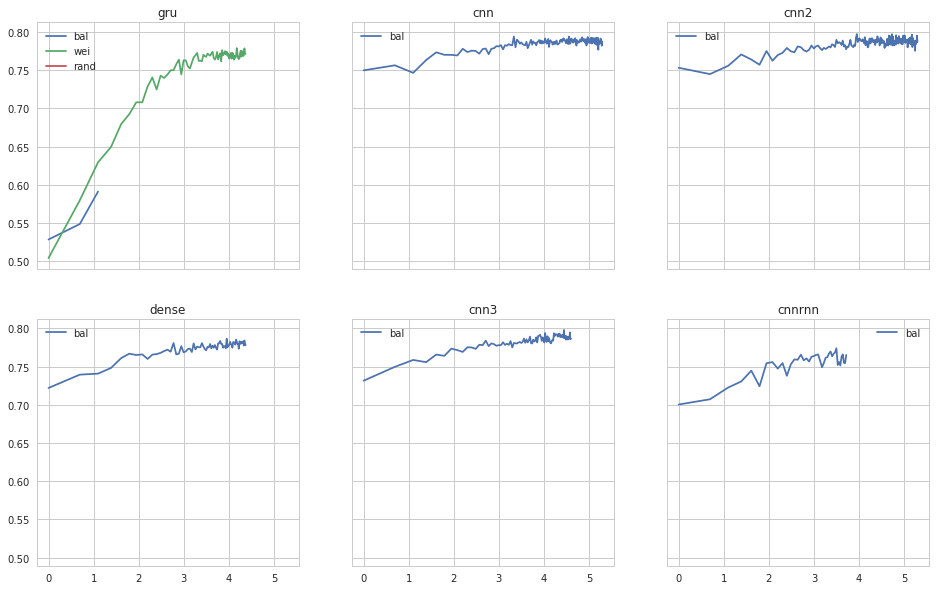

In [7]:
# # no 9mers_imbalanced due to the very poor results

# folders = ["gru_rand", "gru_wei", "gru_wei_b64"]

# models = {}
# approach = {}
# for fold in folders:
#     approach[fold] = {}
#     for subfold in os.listdir(fold):
#         if os.path.isdir(fold + subfold) and not subfold.startswith("."):
#             if subfold not in models:
#                 models[subfold] = {}
#             with open(fold + subfold + "/history.f1.txt") as inp:
#                 data = [float(x) for x in inp.readlines()]
#                 models[subfold][fold] = data
#                 approach[fold][subfold] = data

n_app = 3
n_models = 7

folders = ["gru_bal", "gru_wei", "gru_rand", "cnn_bal", "cnn2_bal", "dense_bal", "cnn3_bal", "cnnrnn_bal"]

history_files = ["f1"]


metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)
    
    
rows = round(n_models ** 0.5)
cols = round(n_models ** 0.5)
f, ax = plt.subplots(rows - 1, cols, figsize=(16, 10), sharey=True, sharex=True)
for i, key in enumerate(models):
    for subkey in models[key]:
        r, c = i // rows, i%cols
        ax[r,c].set_title(key)
        ax[r,c].plot(np.log(range(len(models[key][subkey]))), models[key][subkey], label = subkey)
        ax[r,c].legend()